In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import pandas as pd
from planet_cookbook import read_reports as rr
import os
import rebound
import seaborn as sns

sol_to_earth = 332946.078
G = 6.6743* 10**(-11) #N⋅m2/kg2
M_sun = 1.989e+33 #g
AU = 1.496e+13 #cm

In [2]:
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 10,
   'xtick.labelsize': 20,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

In [3]:
#Color-blind friendly pallete
colors = [
    "#0C7BDC",  # Vibrant Blue
    "#E66100",  # Bright Orange
    "#40B0A6",  # Teal/Aqua
    "#8B8D8B",  # Medium Grey
    "#5D3A9B"   # Muted Purple
]

vib_blue = "#0C7BDC"
teal = "#40B0A6"
purple = "#5D3A9B" 

In [4]:
solar_system_df = pd.read_csv('solarsystem.csv')
mercury = solar_system_df[solar_system_df['name'] == 'Mercury']
venus = solar_system_df[solar_system_df['name'] == 'Venus']
earth = solar_system_df[solar_system_df['name'] == 'Earth']
mars = solar_system_df[solar_system_df['name'] == 'Mars']

In [5]:
ueda_v3_pldf_list = rr.get_pldfs_uniform("/Users/honeyeah/Codes/data/", "ueda_v3", "ueda_v3_", 30, 2.99e6, 0.33)
cham_cont_pldf_list = rr.get_pldfs_uniform("/Users/honeyeah/Codes/data/", "cham_cont", "cham_cont_", 30, 2.99e6, 0.33)
cham_bench_pldf_list = rr.get_pldfs_uniform("/Users/honeyeah/Codes/data/", "cham_bench", "cham_simarchive_", 30, 2.99e6, 0.33)

/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed. Binary file was saved with REBOUND Version 4.4.7. You are currently using REBOUND Version 4.4.8.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:150: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/Users/honeyeah/miniconda3/envs/haniyeh_research/lib/python3.13/site-packages/rebound/simulationarchive.py:103: Run

In [6]:
ueda_v3_pldf = pd.concat(ueda_v3_pldf_list)
cham_bench_pldf = pd.concat(cham_bench_pldf_list)
cham_cont_pldf = pd.concat(cham_cont_pldf_list)

In [7]:
def mercury_sim_index(masses, cmfs):
    cmf_merc =  mercury['CMF'].values[0]
    mass_merc =  mercury['m'].values[0]
    cmf_diff = np.sum(((cmfs - cmf_merc)/( np.average(np.concatenate((mercury['CMF'], cmfs))) * len(cmfs)))**2)
    masses_diff = np.sum(((masses - mass_merc)/( np.average( np.concatenate((mercury['m'], masses)) ) * len(masses)))**2)

    index = np.sqrt((cmf_diff + masses_diff)/2)
    return index

def mercury_sim_index_cmf_only(cmfs):
    cmf_merc =  mercury['CMF'].values[0]
    cmf_diff = np.sum(((cmfs - cmf_merc)/( np.average( np.concatenate((mercury['CMF'], cmfs)) )))**2)

    index = np.sqrt(cmf_diff)
    return index

In [8]:
#Mercury similarity conditions
semi_lower_bound = mercury['a'].values[0] - 0.02
semi_upper_bound = mercury['a'].values[0] + 0.02

ueda_v3_mercs = ueda_v3_pldf[(ueda_v3_pldf['semi'] > semi_lower_bound) & (ueda_v3_pldf['semi'] < semi_upper_bound)]
cham_bench_mercs = cham_bench_pldf[(cham_bench_pldf['semi'] > semi_lower_bound) & (cham_bench_pldf['semi'] < semi_upper_bound)]
cham_cont_mercs = cham_cont_pldf[(cham_cont_pldf['semi'] > semi_lower_bound) & (cham_cont_pldf['semi'] < semi_upper_bound)]

In [9]:
ueda_inds = mercury_sim_index(ueda_v3_mercs['mass'].values * sol_to_earth, ueda_v3_mercs['cmf'].values)
ueda_inds_cmf = mercury_sim_index_cmf_only(ueda_v3_mercs['cmf'].values)
print("Ueda_v3")
print("Merc similarity index = ", ueda_inds)
#print("Merc similarity index, CMF only = ", ueda_inds_cmf)

Ueda_v3
Merc similarity index =  0.5647384914071453


In [10]:
cham_bench_inds = mercury_sim_index(cham_bench_mercs['mass'].values * sol_to_earth, cham_bench_mercs['cmf'].values)
cham_bench_inds_cmf = mercury_sim_index_cmf_only(cham_bench_mercs['cmf'].values)
print("cham_bench")
print("Merc similarity index = ", cham_bench_inds)
#print("Merc similarity index, CMF only = ", cham_bench_inds_cmf)

cham_bench
Merc similarity index =  0.4374245923329431


In [11]:
cham_cont_inds = mercury_sim_index(cham_cont_mercs['mass'].values * sol_to_earth, cham_cont_mercs['cmf'].values)
cham_cont_inds_cmf = mercury_sim_index_cmf_only(cham_cont_mercs['cmf'].values)
print("cham_cont")
print("Merc similarity index = ", cham_cont_inds)
#print("Merc similarity index, CMF only = ", cham_cont_inds_cmf)

cham_cont
Merc similarity index =  0.6101887486633483


# Step funcs

In [12]:
ueda_steps = pd.read_csv("ueda_v3_grid_fulldf.csv")
cham_bench_steps = pd.read_csv("cham_bench_grid_fulldf.csv")
cham_cont_steps = pd.read_csv("cham_cont_grid_fulldf.csv")

ueda_steps_mercs = ueda_steps[(ueda_steps['semi'] > semi_lower_bound) & (ueda_steps['semi'] < semi_upper_bound)]
cham_bench_steps_mercs = cham_bench_steps[(cham_bench_steps['semi'] > semi_lower_bound) & (cham_bench_steps['semi'] < semi_upper_bound)]
cham_cont_steps_mercs = cham_cont_steps[(cham_cont_steps['semi'] > semi_lower_bound) & (cham_cont_steps['semi'] < semi_upper_bound)]

In [13]:
ueda_inds_step = mercury_sim_index(ueda_steps_mercs['mass'].values * sol_to_earth, ueda_steps_mercs['cmf'].values)
ueda_inds_cmf_step = mercury_sim_index_cmf_only(ueda_steps_mercs['cmf'].values)
print("Ueda_v3")
print("Merc similarity index = ", ueda_inds_step)
#print("Merc similarity index, CMF only = ", ueda_inds_cmf_step)

Ueda_v3
Merc similarity index =  0.22599765327856058


In [14]:
cham_bench_inds_step = mercury_sim_index(cham_bench_steps_mercs['mass'].values * sol_to_earth, cham_bench_steps_mercs['cmf'].values)
cham_bench_inds_cmf_step = mercury_sim_index_cmf_only(cham_bench_steps_mercs['cmf'].values)
print("cham_bench")
print("Merc similarity index, step = ", cham_bench_inds_step)
#print("Merc similarity index, CMF only = ", cham_bench_inds_cmf_step)

cham_bench
Merc similarity index, step =  0.10821530501890603


In [15]:
cham_cont_inds_step = mercury_sim_index(cham_cont_steps_mercs['mass'].values * sol_to_earth, cham_cont_steps_mercs['cmf'].values)
cham_cont_inds_cmf_step = mercury_sim_index_cmf_only(cham_cont_steps_mercs['cmf'].values)
print("cham_cont")
print("Merc similarity index, step = ", cham_cont_inds_step)
#print("Merc similarity index, CMF only = ", cham_cont_inds_cmf_step)

cham_cont
Merc similarity index, step =  0.16903179712335684


In [16]:
np.sqrt(np.sum(((cham_cont_steps_mercs['cmf'] - 0.7)/(np.average(cham_cont_steps_mercs['cmf'])))**2)/len(cham_cont_steps_mercs['cmf']))

np.float64(0.2516965045149166)

In [17]:
def mercury_sim_index_divide(masses, cmfs):
    cmf_merc =  mercury['CMF'].values[0]
    mass_merc =  mercury['m'].values[0]
    cmf_diff = np.sum(((cmfs - cmf_merc)/( np.average( np.concatenate((mercury['CMF'], cmfs)) )))**2)
    masses_diff = np.sum(((masses - mass_merc)/( np.average( np.concatenate((mercury['m'], masses)) ) ))**2)

    index = np.sqrt(cmf_diff/len(cmfs) + masses_diff/len(masses))
    return index

In [18]:
cham_cont_inds_step_div = mercury_sim_index_divide(cham_cont_steps_mercs['mass'].values * sol_to_earth, cham_cont_steps_mercs['cmf'].values)

print("cham_cont")
print("Merc similarity index, step = ", cham_cont_inds_step_div)

cham_cont
Merc similarity index, step =  1.373220811434785


In [19]:
uniforms = {
    "Cham2013 bimod": cham_bench_inds,
    "Cham2013 cont": cham_cont_inds,
    "Ueda2021": ueda_inds
}

steps = {
    "Cham2013 bimod": cham_bench_inds_step,
    "Cham2013 cont": cham_cont_inds_step,
    "Ueda2021": ueda_inds_step
}

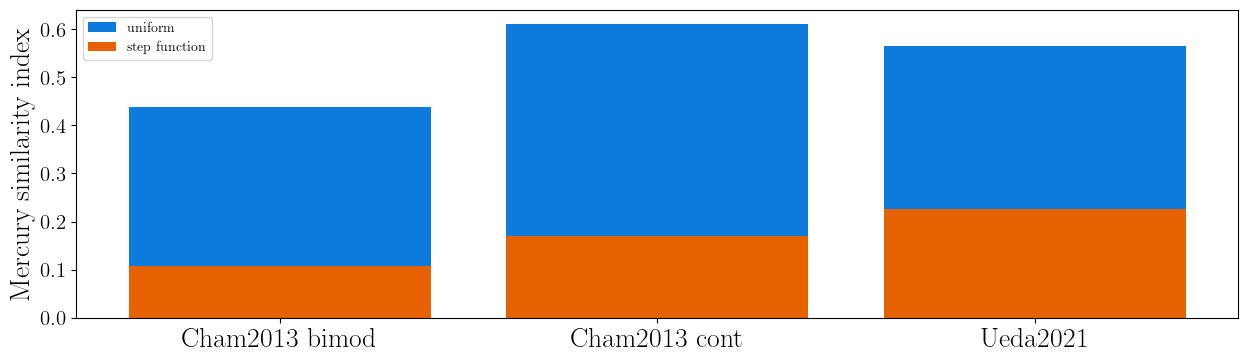

In [20]:
# Bar plot
plt.figure(figsize=(15,4))
plt.bar(uniforms.keys(), uniforms.values(), label = 'uniform', color = colors[0])
plt.bar(steps.keys(), steps.values(), label = 'step function', color = colors[1])

plt.legend()
plt.ylabel("Mercury similarity index")
plt.show()

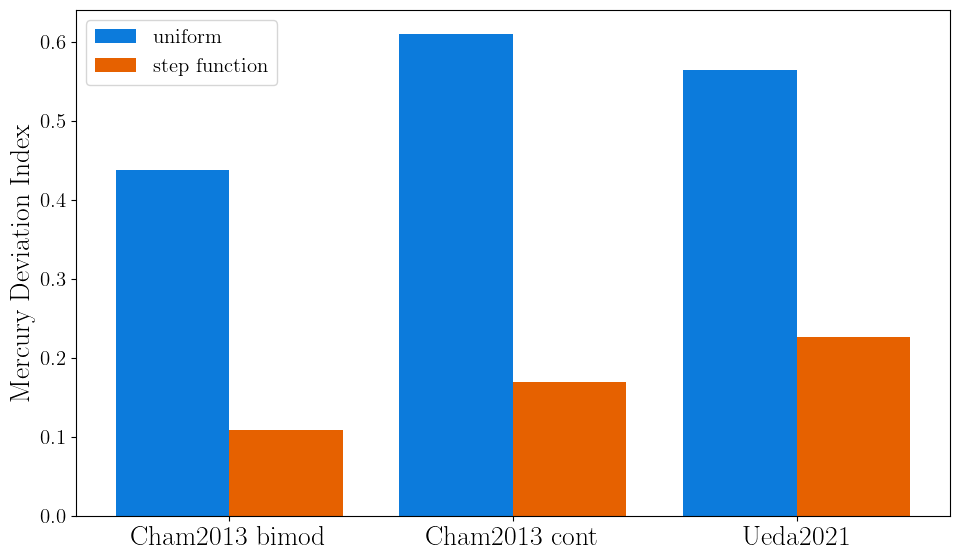

In [23]:
labels = list(uniforms.keys())  # assumes both dicts have same keys in same order
x = np.arange(len(labels))      # numeric positions
width = 0.4                     # width of each bar

plt.figure(figsize=(10,6))
plt.bar(x - width/2, uniforms.values(), width, label='uniform', color=colors[0])
plt.bar(x + width/2, steps.values(), width, label='step function', color=colors[1])

plt.xticks(x, labels)
plt.ylabel("Mercury Deviation Index")
plt.legend(fontsize=15)
plt.tight_layout()

plt.savefig("paper_plots/merc_dev_index.pdf", dpi=30)
plt.show()


In [22]:
mercury

,name,m,a,CMF,color
0,Mercury,0.055,0.387,0.7,#D81B60
